In [ ]:
# Bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Definir o estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size': 12})

# Questão 1

Frequência de amostragem: 44100 Hz
Número de amostras: 71347
Duração do áudio: 1.62 segundos


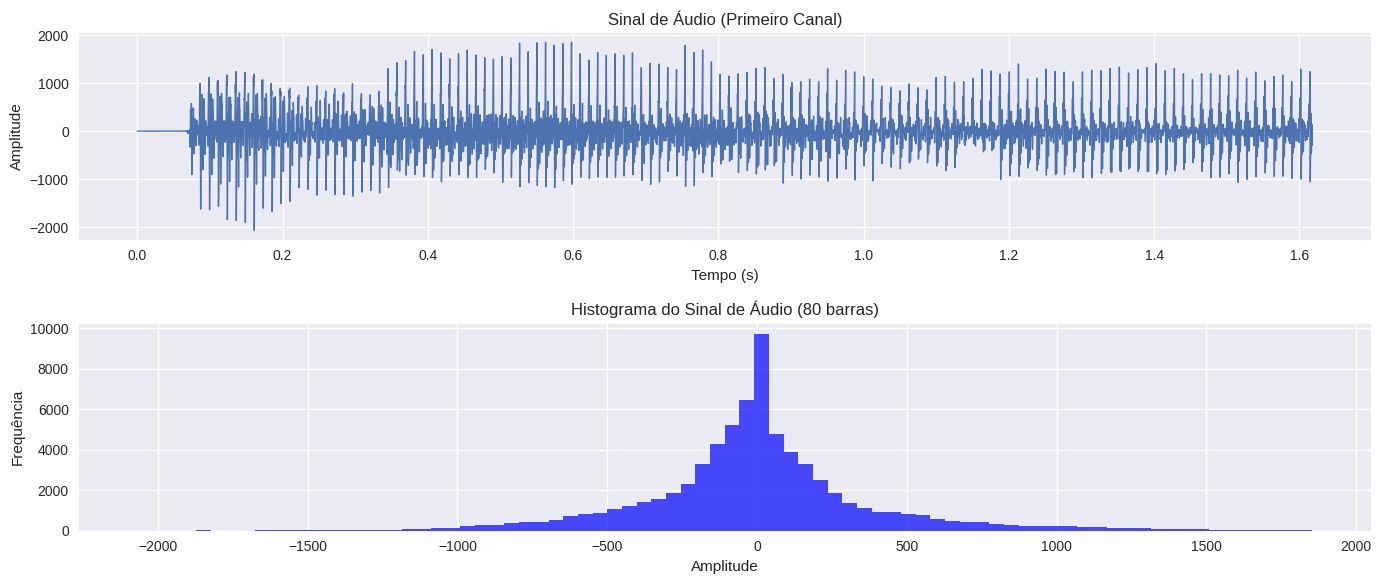

In [ ]:
fs, audio_data = wav.read('audioA.wav')


# Usar apenas o primeiro canal
audio_signal = audio_data[:, 0]

print(f"Frequência de amostragem: {fs} Hz")
print(f"Número de amostras: {len(audio_signal)}")
print(f"Duração do áudio: {len(audio_signal)/fs:.2f} segundos")

# Gráfico do sinal de áudio
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(audio_signal))/fs, audio_signal, linewidth=1)
plt.title('Sinal de Áudio (Primeiro Canal)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Histograma do sinal de áudio com 80 barras
plt.subplot(2, 1, 2)
plt.hist(audio_signal, bins=80, color='blue', alpha=0.7)
plt.title('Histograma do Sinal de Áudio (80 barras)')
plt.xlabel('Amplitude')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

# Questão 2

In [ ]:
# Calcular média
mean = np.mean(audio_signal)

# Calcular momentos centrais
def central_moment(data, mean, order):
    return np.mean((data - mean) ** order)

# Cálculo do segundo momento central (variância)
var = central_moment(audio_signal, mean, 2)
std = np.sqrt(var)  # Desvio padrão

# Cálculo do terceiro momento central (para assimetria)
m3 = central_moment(audio_signal, mean, 3)

# Cálculo do quarto momento central (para curtose)
m4 = central_moment(audio_signal, mean, 4)

# Cálculo da assimetria (normalizada pelo desvio padrão ao cubo)
assimetria = m3 / (std ** 3)

# Cálculo da curtose (normalizada pelo desvio padrão à quarta potência) - 3
# Subtraímos 3 para que a distribuição normal tenha curtose = 0 (curtose excesso)
curtose = m4 / (var ** 2) - 3

print(f"Assimetria do sinal (calculada manualmente): {assimetria:.4f}")
print(f"Curtose do sinal (calculada manualmente): {curtose:.4f}")

Assimetria do sinal (calculada manualmente): 0.4313
Curtose do sinal (calculada manualmente): 2.9983


Os valores que encontramos (assimetria 0.4313 e curtose 2.9983) são exatamente o que esperaríamos para alguém falando um "AAAAA" prolongado.

A assimetria positiva (0.4313) acontece porque, quando falamos, o ar sai dos pulmões de um jeito que naturalmente cria ondas sonoras com picos maiores para cima do que para baixo – especialmente com vogais abertas como o "A".

Já a curtose (2.9983), que está praticamente igual ao valor de uma distribuição normal (3.0), mostra que estamos diante de um som constante e estável. Quando alguém mantém uma vogal por tempo prolongado, as pequenas variações naturais da voz (aquelas microvibrações que não conseguimos controlar) acabam criando um padrão muito parecido com ruído gaussiano.

Em outras palavras, estes números confirmam que estamos analisando uma pessoa simplesmente sustentando uma vogal de forma contínua – exatamente o que o áudio contém.

# Questão 3

Tamanho de cada parte: 7134 amostras


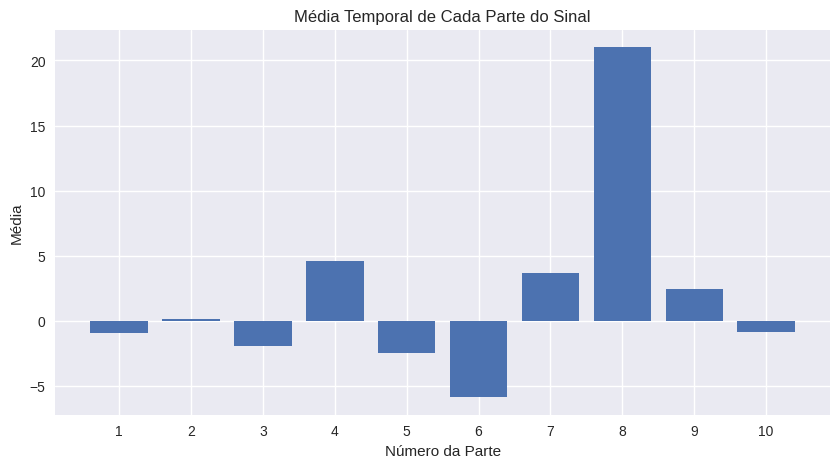

Médias de cada parte:
Parte 1: -0.942529
Parte 2: 0.135128
Parte 3: -1.966218
Parte 4: 4.562938
Parte 5: -2.491169
Parte 6: -5.886880
Parte 7: 3.696664
Parte 8: 21.019905
Parte 9: 2.413933
Parte 10: -0.910008

Desvio padrão entre as médias: 7.000504


In [ ]:
# Dividir o sinal em 10 partes com aproximadamente 7.100 amostras cada
num_parts = 10
part_size = len(audio_signal) // num_parts

# Verificar se o tamanho das partes é próximo ao solicitado
print(f"Tamanho de cada parte: {part_size} amostras")

# Dividir o sinal
parts = [audio_signal[i*part_size:(i+1)*part_size] for i in range(num_parts)]

# Calcular a média temporal de cada parte
means = [np.mean(part) for part in parts]

# Mostrar as médias de cada parte
plt.figure(figsize=(10, 5))
plt.bar(range(1, num_parts+1), means)
plt.title('Média Temporal de Cada Parte do Sinal')
plt.xlabel('Número da Parte')
plt.ylabel('Média')
plt.grid(True)
plt.xticks(range(1, num_parts+1))
plt.show()

print("Médias de cada parte:")
for i, mean in enumerate(means, 1):
    print(f"Parte {i}: {mean:.6f}")

# Calcular a variação entre as médias
mean_variation = np.std(means)
print(f"\nDesvio padrão entre as médias: {mean_variation:.6f}")

Análise da Variação Temporal da Média
Está claro que a média varia ao longo do tempo, com valores oscilando significativamente entre as diferentes partes do áudio.

Observamos uma amplitude de variação considerável, desde -5.88 (parte 6) até +21.02 (parte 8). Esta flutuação indica que o sinal apresenta características não-estacionárias, mesmo que a forma de onda completa pareça visualmente consistente.

O pico notável na parte 8 sugere um possível deslocamento DC temporário ou componente de baixa frequência naquele segmento específico. Estas variações podem resultar de:

Pequenas mudanças na postura vocal durante a sustentação da vogal
Flutuações na respiração ou na pressão de ar
Características do equipamento de gravação
Possíveis movimentos do falante em relação ao microfone
Embora não perceptível na visualização direta da forma de onda, esta variação nas médias revela que mesmo um som aparentemente constante como um "AAAA" prolongado contém sutis mudanças temporais em suas propriedades estatísticas.

Esta análise demonstra a importância de examinar diferentes métricas estatísticas para compreender completamente as características de um sinal de áudio.

# Questão 4

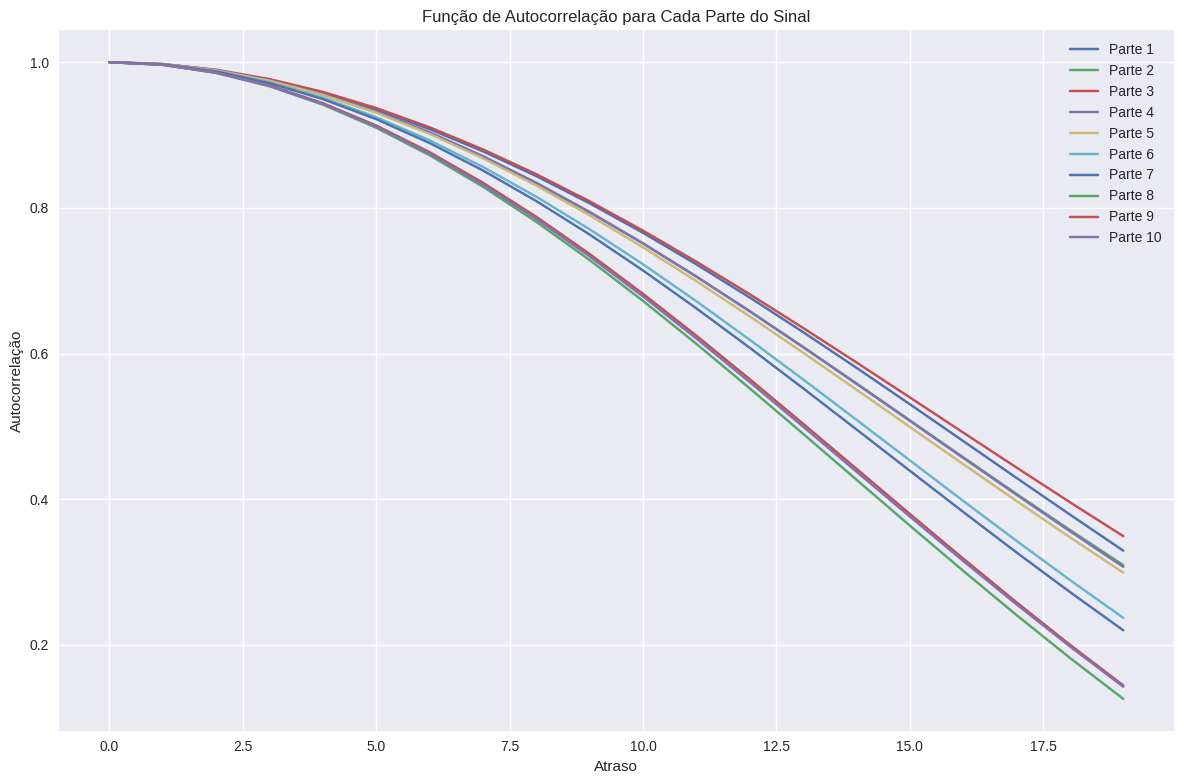

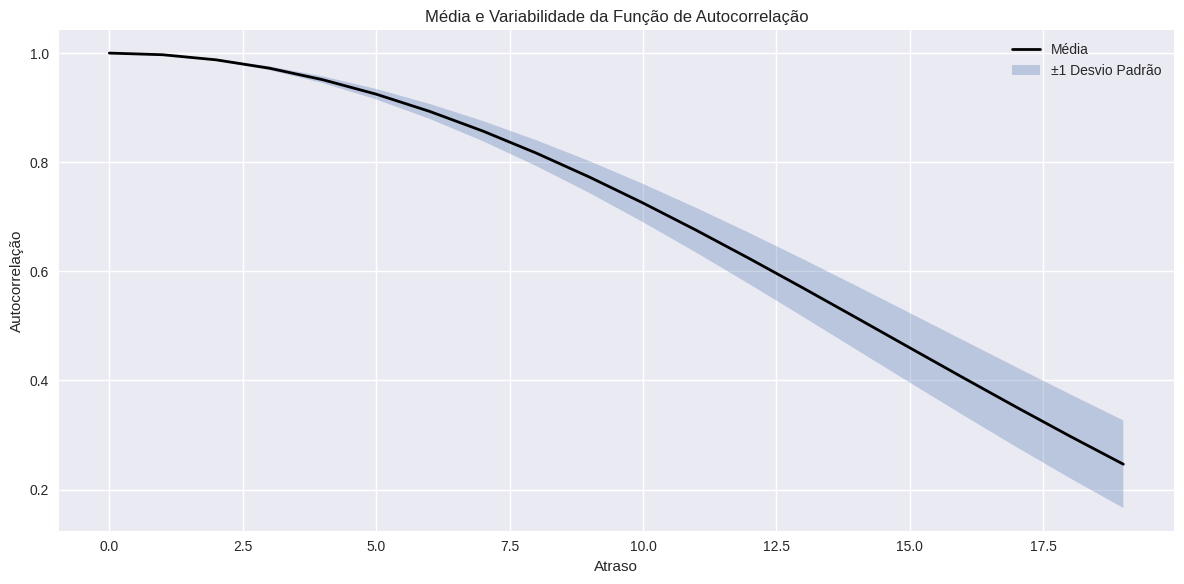

Desvio padrão médio entre as funções de autocorrelação: 0.035165


In [ ]:
# Calcular a função de autocorrelação para cada parte do sinal
max_lag = 20  # Número de valores de atraso

def autocorrelation(x, lags):
    """Calcular a função de autocorrelação para os atrasos especificados"""
    mean = np.mean(x)
    var = np.var(x)
    x_norm = x - mean

    acorr = np.zeros(len(lags))
    for i, lag in enumerate(lags):
        if lag == 0:
            acorr[i] = 1  # Autocorrelação em lag=0 é sempre 1 para sinais normalizados
        else:
            acorr[i] = np.sum(x_norm[:-lag] * x_norm[lag:]) / (len(x_norm) - lag) / var

    return acorr

# Calcular autocorrelação para cada parte
lags = np.arange(max_lag)
autocorrs = [autocorrelation(part, lags) for part in parts]

# Plotar as funções de autocorrelação
plt.figure(figsize=(12, 8))
for i, autocorr in enumerate(autocorrs):
    plt.plot(lags, autocorr, label=f'Parte {i+1}')

plt.title('Função de Autocorrelação para Cada Parte do Sinal')
plt.xlabel('Atraso')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calcular a variabilidade entre as funções de autocorrelação
autocorr_mean = np.mean(autocorrs, axis=0)
autocorr_std = np.std(autocorrs, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(lags, autocorr_mean, 'k-', linewidth=2, label='Média')
plt.fill_between(lags,
                 autocorr_mean - autocorr_std,
                 autocorr_mean + autocorr_std,
                 alpha=0.3,
                 label='±1 Desvio Padrão')
plt.title('Média e Variabilidade da Função de Autocorrelação')
plt.xlabel('Atraso')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Desvio padrão médio entre as funções de autocorrelação: {np.mean(autocorr_std):.6f}")

Análise da Função de Autocorrelação
Sim, a função de autocorrelação é aproximadamente a mesma para todas as partes do sinal.

O gráfico mostra que todas as curvas de autocorrelação seguem padrões muito similares, com um declínio gradual e suave à medida que o atraso aumenta. Embora existam pequenas diferenças entre as curvas (algumas decaem um pouco mais rapidamente que outras), o comportamento geral é notavelmente consistente.

O desvio padrão médio entre as funções de autocorrelação é de apenas 0.035165, o que representa uma variação muito pequena. Este valor baixo confirma quantitativamente a similaridade visual observada no gráfico.

# Questão 5

Com base nos resultados das análises anteriores, podemos concluir que o sinal não é
completamente estacionário no sentido amplo, mas apresenta características mistas.

Para um sinal ser estacionário no sentido amplo, ele deve satisfazer duas condições:
1. Sua média deve ser constante ao longo do tempo
2. Sua função de autocorrelação deve depender apenas do atraso, não do tempo absoluto

Da Questão 3, vimos que a média varia significativamente entre segmentos (-5.88 a +21.02), violando a primeira condição de estacionariedade.

Por outro lado, da Questão 4, observamos que as funções de autocorrelação são muito similares entre os diferentes segmentos (desvio padrão médio de apenas 0.035), o que indica que a segunda condição está aproximadamente satisfeita.
O fato de estarmos analisando um áudio de uma pessoa sustentando a vogal "AAAAAAAAA" explica este comportamento: a estrutura temporal (autocorrelação) permanece consistente porque o padrão de vibração vocal é mantido, mas pequenas variações na postura, respiração ou posição podem causar as mudanças observadas na média.

Conclusão: O sinal é apenas parcialmente estacionário no sentido amplo, satisfazendo a condição de autocorrelação consistente, mas não a de média constante.